# [RAG - Retrieval Augmented Generation](https://brunch.co.kr/@ywkim36/146)

- 소프트웨어 산업에는 하루에도 수십 개의 새로운 약어와 개념이 등장합니다. 특히나 빠르게 변하는 AI 기술 같은 경우라면 더욱 말입니다.
- 새로운 밀레니엄을 앞둔 1999년 출간되어 벌써 25년이 지난 빌게이츠의 명저 "생각의 속도"에서는 `"새로운 테크놀로지를 이해하기 위해서는 바로 그 이전의 기술에 대한 이해가 필요하고, 그 흐름을 한번 놓치면, 생각의 속도는 영원히 뒤쳐진다."`라는 구절이 나오는데, 이 말이 요즘처럼 피부로 이해되는 시기는 없었던 것 같습니다.

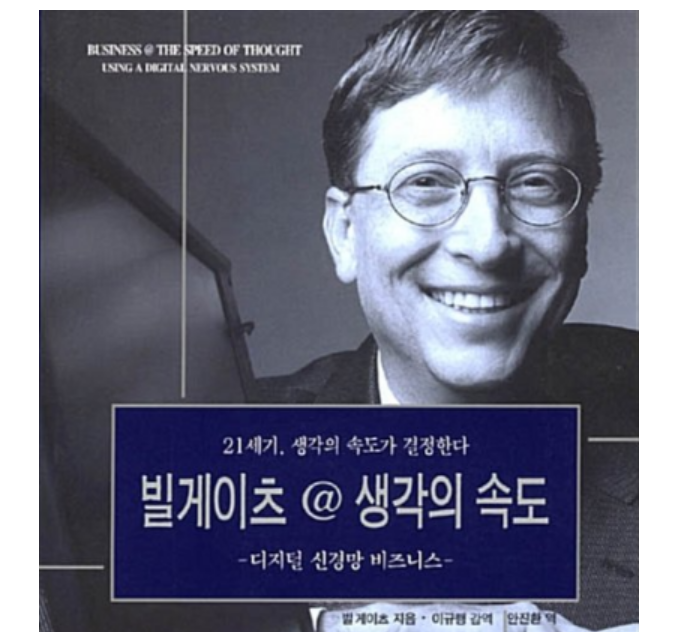

## LLM의 문제점

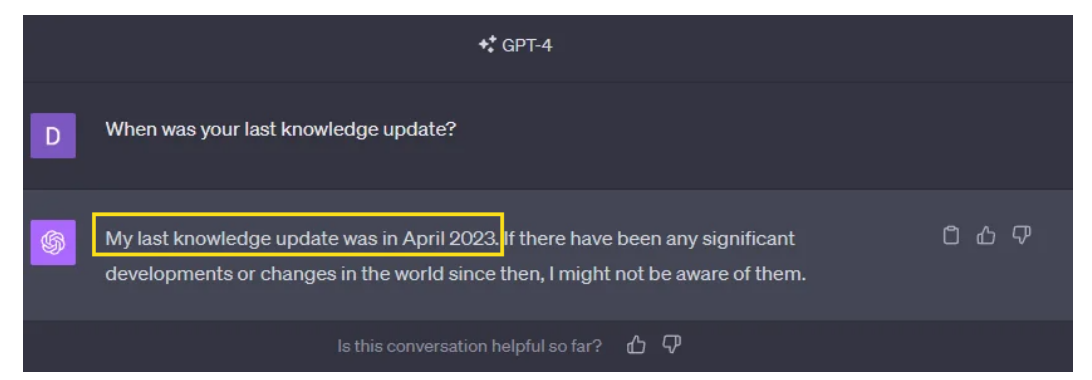

- 요즘 LLM은 어디에나 존재합니다. ChatGPT뿐만 아니라 구글의 제미나이, 네이버의 하이퍼클로버도 있습니다.
- LLM은 질문에 놀랍게 답을 주기도 하고, 어떤 경우엔 매우 흥미롭게 틀리기도 합니다.
- LLM이 이렇게 똑똑한 이유는 매일매일 많은 자료를 학습하기 때문입니다. 그런데 이렇게 쉼 없이 학습을 하다간 LLM 서비스를 내놓을 수가 없습니다.
- 그러나 보니, 특정 날까지 학습한 LLM을 서비스로 만들어 내놓습니다. 그렇게 나온 것들이 ChatGPT 3, 3.4, 4 등과 같은 버전들입니다.
- ChatGPT 4의 경우엔 2023년 4월까지의 데이터로 학습한 상태입니다. 따라서 그 이후에 일어난 사건이나 지식에 대해서는 알지 못합니다. 이것은 비지니스 입장에서 치명적인 단점이 될 수 있습니다.

아래는 구체적인 단점들을 설명하였습니다.

### 모델 환각 현상(Model Hallucination Problem)
- LLM이 생성하는 텍스트는 확률에 기반해 생성됩니다.
- 충분한 사실 검증 없다면, LLM은 일관성이 없지만 사실인 것 같은 내용을 생성하기도 합니다.

### 적시성 문제(Timeliness problem)
- LLM의 파라미터 사이즈가 커질수록, 훈련 비용은 증가하고 소요 시간은 길어지게 됩니다.
- 결과적으로, 시간적으로 최신의 데이터(time sensitive data)가 훈련에 포함되지 않을 수 있는데요.
- 이로 인해 모델이 최신 정보에 대한 질문에 답변에 하지 못하는 경우가 발생하기도 합니다.

### 데이터 보안 문제(Data security problem)
- 일반적인 LLM은 기업 내부 혹은 사용자의 개인 데이터에 접근 권한이 없습니다.
- LLM을 사용하면서 데이터 보안을 확실하게 하려면 데이터를 로컬에 저장하고 모든 데이터 연산을 로컬에서 수행하는 것에 좋은데요.
- 클라우드 LLM은 정보를 요약하는 목적으로만 사용되게 됩니다.

## RAG란?
- RAG는 LLM의 문제점인 학습된 지식에만 의존하는 것이 아니라 새로운 지식을 추가(증강)하여 LLM이 올바른 답변을 할 수 있게 도와줍니다.

아래는 RAG의 의미를 풀어서 설명한 내용입니다.

- `R(Retrieval)`
  - 검색이란 의미보다는 "어디선가 가져오는 것, 집어오는 것"입니다.
  - 즉, 어딘가에 가서 요청된 무언인가를 집어오는 것으로 해석할 수 있습니다.
- `A(Augmented)`
  - 증강되었다는 뜻으로, 원래 것에 뭔가 덧붙이거나 보태어 더 충실하게 좋아졌다고 해석할 수 있습니다.
- `G(Generation)`
  - 생성이란 뜻으로, 프롬프트라고 하는 사용자 질문/질의에 대한 응답을 텍스트로 생성하는 것을 의미합니다.

### RAG 프레임워크 플로우

- RAG는 아래와 같은 플로우를 통해서 LLM에 증강된 컨텍스트(추가 정보)를 제공함으로써 LLM이 좀더 올바른 응답을 할 수 있도록 도와줄 수 있습니다.

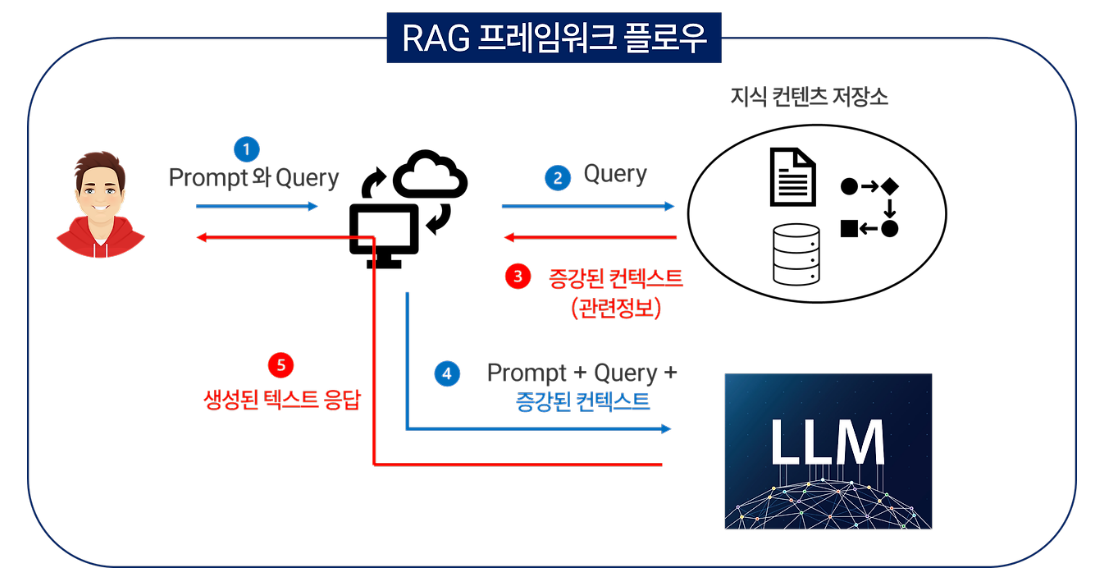

### RAG의 특징
- RAG는 아래의 특징을 갖고 있기 때문에, 언급된 LLM의 문제들을 효과적으로 해결할 수 있습니다.

#### 확장성(Scalability)
- RAG는 LLM 모델 사이즈와 훈련 비용을 줄일 수 있는 방안이며, 지식을 빠르게 확장할 수 있는 방법입니다.
- 자체 LLM을 보유할 필요 없고, 모델을 미세 조정하는데 시간과 비용을 들일 필요가 없게 됩니다.

#### 정확성(Accuracy)
- 모델이 검색을 통해 사실에 기반한 답변을 제공하기 때문에, 환각 현상을 최소화할 수 있습니다.

#### 제어 가능성(Controllability)
- RAG를 사용하면 최신 정보 검색과 맞춤화(customization)가 가능합니다.
- 질문의 의도를 측정해 답변을 종합할 때 검색 방법을 사용해 다양한 컨텍스트에 근거한 요소를 참조할 수 있는 기능이 있기 때문입니다.

#### 설명 가능성(Explainability)
- 검색된 관련 정보는 모델이 예측하는데 참조 역할을 합니다.

#### 범용성(Versatility)
- RAG는 QA, 요약, 대화 등 다양한 작업에 파인 튜닝과 커스터마이즈가 가능합니다.

# [RAG의 3가지 주요 패러다임](https://www.gnict.org/blog/130/%EA%B8%80/%EB%8C%80%EA%B7%9C%EB%AA%A8-%EC%96%B8%EC%96%B4-%EB%AA%A8%EB%8D%B8%EC%9D%84-%EC%9C%84%ED%95%9C-%EA%B2%80%EC%83%89-%EC%A6%9D%EA%B0%95-%EC%83%9D%EC%84%B1rag-%EA%B8%B0%EC%88%A0-%ED%98%84%ED%99%A9/)
- RAG 기술의 연구 패러다임은 시간에 따라 끊임없이 발전하고 있습니다.
- 주요 패러다임들은 기본 RAG, 고급 RAG, 모듈형 RAG의 3가지로, 초창기의 기본 RAG는 비용 효율적이고 LLM만 사용하는 것보다 성능이 뛰어났지만 많은 단점들이 있었습니다.
- 고급 RAG와 모듈러 RAG의 등장은 기본 RAG의 특정 결함을 해결하기 위한 것이었습니다.

## 기본 RAG(Naive RAG)

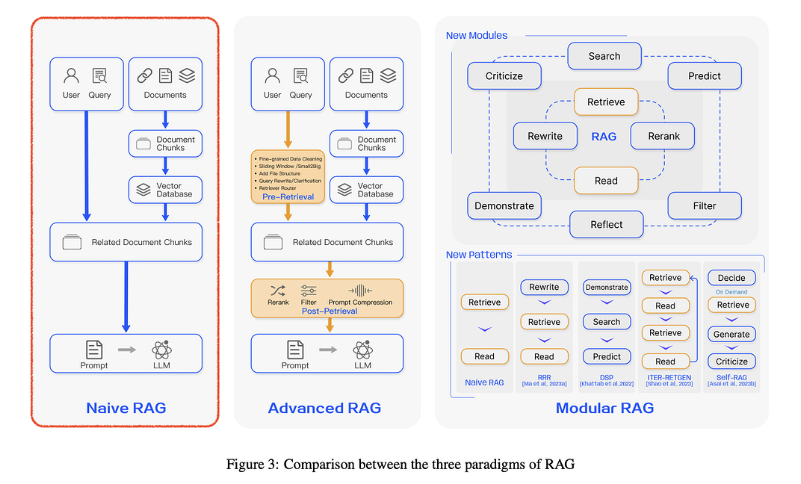

- 기본 RAG는 RAG 연구의 초기 방법론을 지칭하며, 전통적인 인덱싱, 검색 및 생성 과정을 포함하고 있습니다. 기본 RAG는 주로 간단한 검색 및 생성 방식에 초점을 맞추고 있으며, RAG의 기본 개념과 원리를 설명하는데 중요합니다.
- 하지만, 낮은 검색 정확도, 응답 생성의 낮은 품질, 증강 과정의 어려움 등에 따라 발생하는 불필요한 반복, 부정확한 정보, 잘못된 문맥의 통합 등이 발생할 수 있습니다. 따라서 복잡하거나 도전적인 시나리오에 기본 RAG를 사용하기는 부적절할 수 있습니다.

기본 RAG의 주요 구성요소로는 `인덱싱(Indexing)`, `검색(Retrieve)`, `생성(Generation)`이 있습니다

### 인덱싱(Indexing)
- 데이터 소스에서 데이터를 얻고 인덱스를 생성하는 과정으로 오프라인 상태에서 일반적으로 수행됩니다.

이 과정은 `데이터 정제`, `청크 분할`, `벡터 인코딩 및 인덱스 생성`을 포함합니다.

- `데이터 인덱싱`
  - 이 단계는 원본 데이터를 정제하고 추출하는 것으로 시작합니다. 여기에는 다양한 파일 형식(예: PDF, HTML, Word, Markdown 등)을 일반 텍스트로 변환하는 작업이 포함됩니다.
  - 이 과정은 데이터를 효율적으로 처리하고 검색하기 위한 기초를 마련합니다.
- `청크(chunk) 분할`
  - 불러온 텍스트를 더 작은 조각(chunk)으로 나누는 작업입니다. 언어 모델은 일반적으로 처리할 수 있는 맥락의 양에 한계가 있기 때문에, 가능한 한 작은 텍스트 청크를 생성하는 것이 필요합니다.
  - 이는 검색 과정에서 모델이 처리할 수 있는 데이터 양을 최적화합니다.
- `임베딩 및 인덱스 생성`
  - 텍스트를 벡터로 인코딩하는 과정입니다. 이렇게 생성된 벡터는 후속 검색 과정에서 질문 벡터와의 유사성을 계산하는 데 사용됩니다.
  - 임베딩 모델은 높은 추론 속도를 요구하며, 사용자가 질문을 할 때 대량의 코퍼스를 실시간으로 인코딩해야 합니다.
  - 이후에는 원본 말뭉치(corpus) 청크와 임베딩을 키-값 쌍 형태로 저장하여, 자주 발생하는 검색에 대비합니다.

### 검색(Retrieve)
- 사용자의 입력을 벡터로 변환하고, 해당 벡터와 문서 블록의 벡터 간 유사성을 계산하여 상위 K 문서 블록을 선택합니다.

### 생성(Generation)
- 주어진 질문과 관련 문서를 결합하여 새로운 프롬프트를 생성하고, 대규모 언어 모델이 이 정보를 기반으로 질문에 답변합니다.

## 고급 RAG(Advanced RAG)

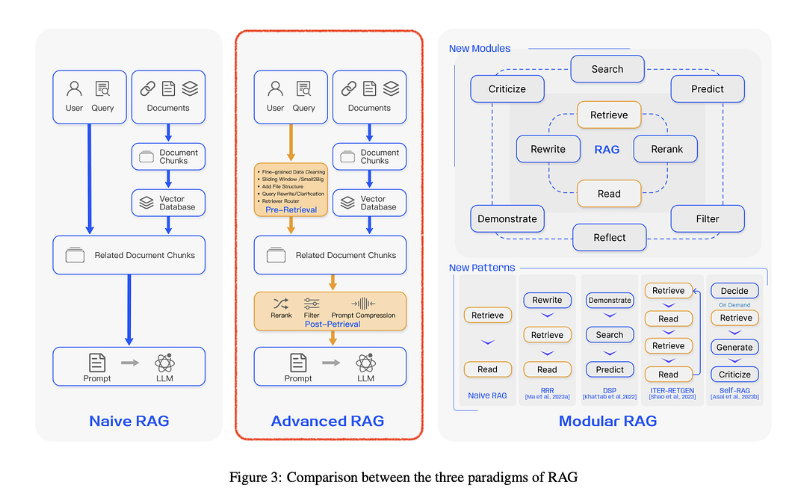

- 고급 RAG는 기본 RAG의 부족한 점을 개선하기 위해 개발된 패러다임입니다.
- 이는 주로 검색 및 생성의 질을 향상시키기 위한 사전 및 사후 검색 방법을 포함합니다.

고급 RAG는 크게 `검색 전 절차(Pre-Retrieval Process)`, `검색 후 절차(Post-Retrieval Process)`, `RAG 파이프라인 최적화(RAG Pipeline Optimization)`의 3단계로 나누어볼 수 있습니다:

### 검색 전 절차(Pre-Retrieval Process)
- 검색 전 절차는 RAG 시스템의 검색 효율성과 결과의 질을 향상시키기 위해 필수적입니다.
- 이 절차는 데이터 인덱싱 최적화 및 임베딩을 통해서 검색 결과의 관련성과 정확성을 높이는 데 중점을 둡니다​​.

크게 2가지 방법들을 살펴보겠습니다.

1. 데이터 인덱싱 최적화(Optimizing Data Indexing)
  - 인덱싱된 콘텐츠 품질을 향상시키기 위해서는 데이터 인덱싱을 최적화하는 것이 필요합니다.
2. 임베딩(Embedding)
  - 임베딩은 효과적인 검색을 위한 RAG의 핵심 구성요소입니다.
  - 임베딩은 검색된 내용과 질문 간의 관련성을 강화하고 최종 생성된 출력에 대한 영향을 최적화하는 데 중요합니다.
  - 특히, 질문과 문서 간의 의미론적 유사성을 측정하고 이를 개선하는 데 필수적입니다​​.

### 검색 후 절차(Post-Retrieval Process)
- 검색 후 절차는 고급 RAG에서 매우 중요한 단계로, 데이터베이스에서 검색된 중요한 문맥을 질의와 결합하여 LLM에 입력하는 과정입니다.
- 예를 들어, 검색 결과로 나온 모든 문서들을 한꺼번에 LLM에 제공하는 것은 비효율적이며, LLM의 컨텍스트 윈도우(context window) 크기를 초과할 수도 있습니다.
- 이러한 문제를 해결하기 위해서는 검색된 문서들의 추가적인 후처리가 필요합니다.

크게 2가지 방법들을 살펴보겠습니다.

1. 순위 다시 매기기(ReRank)
  - 검색 결과들 중 관련성(relevant)이 가장 높은 정보를 프롬프트의 앞부분(edge)으로 재배치하는 직관적인 아이디어입니다.
2. 프롬프트 압축(Prompt Compression)
  - 관련 연구들에 따르면 검색된 문서에서 발생하는 잡음(noise)이 RAG 성능에 부정적인 영향을 끼친다고 합니다.
  - 따라서 후처리 단계에서는 검색 문서들 중 중요하지 않은 맥락을 압축하고, 중요한 문단을 강조하면서 전체 콘텍스트 길이를 줄이는 데 중점을 둡니다.

### RAG 파이프라인 최적화 (RAG Pipeline Optimization)
- 현재까지의 연구들은 다양한 검색 기술을 지능적으로 결합하고, 검색 단계를 최적화하며, 인지적 역추적(cognitive backtracking) 개념을 도입하고, 다양한 질의 전략을 유연하게 적용하며, 임베딩 유사도를 활용하는 데 초점을 맞추고 있습니다.
- RAG 파이프라인 최적화는 효율성과 RAG 검색에서의 맥락적 정보의 풍부함 사이의 균형을 달성하는 것이 목표입니다.

주요한 RAG 파이프라인 최적화 방법론들은 다음과 같습니다

1. 하이브리드 검색(Hybrid Search)
  - 키워드 기반 검색, 의미론적 검색, 벡터 검색과 같은 다양한 기술을 지능적으로 혼합하여 검색하는 방법으로, RAG 시스템이 다양한 질의 유형과 정보 요구에 적응할 수 있게 하여 가장 관련성 높고 맥락이 풍부한 정보를 일관되게 검색하는 것이 목표입니다.
  - 이러한 하이브리드 검색은 검색 전략을 강화하고 RAG 파이프라인의 전반적인 성능을 향상시킬 수 있습니다.
2. 재귀적 검색 및 쿼리 엔진(Recursive Retrieval and Query Engine)
  - 초기 검색 단계에서 더 작은 문서 블록을 획득하여 주요 의미를 포착한 후, 후반 단계에서 더 많은 맥락적 정보를 가진 더 큰 블록을 언어 모델에 제공하는 방법입니다.
  - 이는 효율성과 맥락적으로 풍부한 응답 사이의 균형을 이루는 데 도움이 되며, 이러한 두 단계의 검색 방법은 효율성과 맥락적 풍부함을 조화롭게 결합할 수 있습니다.
3. HyDE(Hypothetical Document Embeddings)
  - HyDE는 LLM이 생성한 문장이 사용자의 질의보다 임베딩 공간에서 더 가까울 수 있다는 가정에 기반한 방법론입니다.
  - 즉, LLM을 사용하여 가상의 문서(= LLM의 답변)를 생성하고, 이를 임베딩한 후, 이 임베딩을 사용하여 실제 문서를 검색하는 방법입니다.
  - HyDE는 질의 기반의 임베딩 유사성을 추구하는 것과 달리, 이 방법은 답변 간의 임베딩 유사성에 중점을 두고 있습니다.

## 모듈형 RAG(Modular RAG)

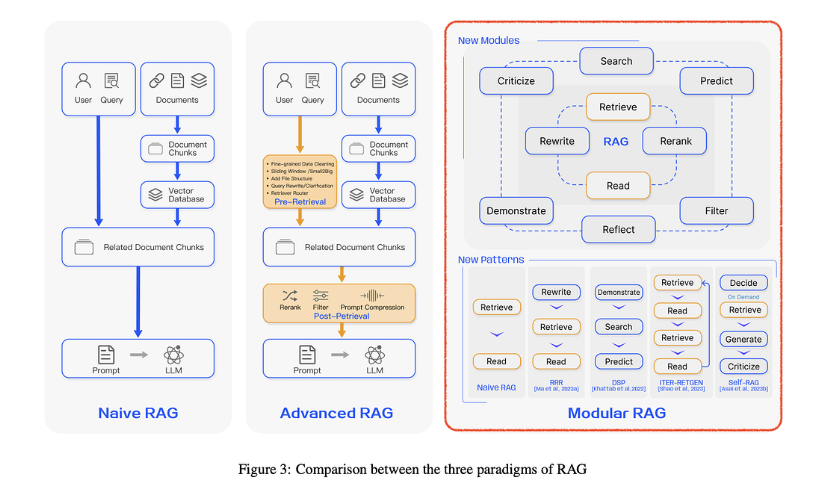

- 모듈식 RAG은 고급 RAG의 발전된 형태로, 기존의 RAG 프레임워크에서 한 단계 더 나아가 다양한 모듈과 기능을 통합하여 더 큰 다양성과 유연성을 제공합니다.
- 이 접근 방식은 RAG 시스템을 다양한 시나리오와 요구 사항에 맞게 조정할 수 있도록 하는 여러 새로운 모듈과 패턴을 포함하고 있습니다.

### 새로운 모듈들(New Modules)

1. 검색 모듈(Search Module)
  - 기본 및 고급 RAG의 유사성 검색과 달리, 검색 모듈은 특정 시나리오에 맞춰 LLM이 생성한 코드나 SQL, 사용자 도구 등을 사용하여 직접 검색을 수행하는 모듈입니다.
  - 이러한 검색 모듈을 사용하는 경우, 외부 검색 엔진이나 텍스트 데이터, 테이블 데이터 또는 지식 그래프 등을 데이터 소스로 사용할 수 있습니다.

2. 메모리 모듈(Memory Module)
  - LLM 자체의 메모리 기능을 사용하여 검색을 개선(guide)하며, 현재 입력과 가장 유사한 기억을 찾는 모듈입니다.
  - 예를 들어, Self-mem 방법론은 검색 강화 생성기(Retrieval-Enhanced Generator)를 반복적으로 사용하여 사용자의 질문(original question)과 이중 질문(dual question)을 결합한 무제한 메모리 풀(unbounded memory pool)을 생성합니다. 이러한 과정을 통하여 추론 과정을 향상시킵니다.

3. 추가 생성 모듈(Extra Generation Module)
  - 검색된 내용의 중복 및 잡음 문제에 대응하기 위한 모듈로, LLM을 활용하여 검색을 위한 문서를 별도로 생성합니다.
  - 사용자의 질문을 데이터 소스에서 직접 검색하는 것보다, 이렇게 LLM에 의해 생성된 콘텐를 사용하였을 때 관련 정보를 더 많이 포함할 가능성이 높습니다.

4. 태스크 적응 모듈(Task Adaptable Module)
  - 다양한 다운스트림(downstream) 작업에 적응할 수 있도록 조정하는 모듈입니다.
  - 각 세부 작업과 모델의 범용성을 강화하는 것을 목표로, 필요한 제로샷 프롬프트를 검색하여 사용(UPRISE 방법)하거나, 제로샷 쿼리를 생성하는 LLM을 별도로 사용(PROMPTAGATOR 방법)하기도 합니다.

5. 정렬 모듈(Alignment Module)
  - 질의와 텍스트 간의 정렬 문제를 해결하기 위해 검색기에 별도의 학습 가능한 어댑터를 추가하는 모듈입니다.
  - PRCA, AAR, RRR 등의 방법론들이 있으며, 이를 통해 검색된 정보를 최적화하고 RAG의 효과를 향상시키는 것이 목적입니다.

6. 검증 모듈(Validation Module)
  - 검색된 정보의 신뢰성을 평가하기 위해 도입되었으며, 실제 문서와 질의 간의 관련성을 평가하는 모듈입니다.
  - 이 모듈은 RAG의 강건성(robustness)을 향상시키는 것이 목표입니다.

### 새로운 패턴들(New Patterns)

- 모듈 추가 또는 교체(Adding or Replacing Modules)
  - 기존의 검색-읽기(RR; Retrieval-Read) 구조를 유지하면서 특정 기능을 향상시키기 위해 추가 모듈을 도입합니다.
  - 예를 들어, 재작성-검색-읽기(RRR; Rewrite-Retrieve-Read) 프로세스를 통해 검색 쿼리를 조작하고, 읽기 모듈의 하위 작업 성능을 향상시킬 수 있습니다.

- 모듈 간 조직적 흐름 조정(Adjusting the Flow between Modules)
  - 언어 모델과 검색 모델 간의 상호작용을 강화하기 위해 모듈 간 조직적 흐름을 조정합니다.
  - 이는 특정 문제 맥락에 기반하여 모듈 내에서의 대체 또는 재구성을 가능하게 합니다.

# [기업용 RAG 아키텍쳐](https://www.okchat.ai/2024/03/10/%EA%B8%B0%EC%97%85%EC%9A%A9-rag-%EC%95%84%ED%82%A4%ED%85%8D%EC%B3%90-%EB%A6%AC%EB%B7%B0/)

- 갈릴레오사에서 발표한 [기업용 RAG 아키텍처에 관한 논문](https://www.rungalileo.io/blog/mastering-rag-how-to-architect-an-enterprise-rag-system)을 리뷰해 보려고 한다.
- 먼저 갈릴레오사에 대해서 좀 설명이 필요할 것 같다. Galileo 사의 Gen AI Studio는 개발자들을 위한 LLM 툴을 제공하는 회사다.
- `Evalute`라는 제품과 `Observe`라는 제품을 보유하고 있는데, `Evalute`는 LLM 기반의 애플리케이션의 성능을 평가한다. 그래서 해당 애플리케이션이 개선할 수 있도록 도와주는 툴이다. `Observe`는 LLM 기반의 애플리케이션을 실시간 모니터링하는 툴이다.
- 이 두 가지 모두 애플리케이션의 동작을 신뢰하기 위한 도구로 기업들은 이 신뢰가 중요하기 때문에 이 툴에 관심을 갖는 것이다.

![](https://www.okchat.ai/wp-content/uploads/2024/03/rag1.gif)

하나씩 리뷰해 보면, 좌측 상단에서부터 시작해서 살펴보자.
1. `유저 입력(user input)`
  - 유저가 챗봇에 뭔가 물어봤을 것이다.
2. `유저 인증(user authentication)`
  - 적합한 유저의 접근인지 확인하는 과정이 필요할 것이다.
3. `입력 가드레일(input guardrail)`
  - 유저가 입력한 것에 개인 정보나 민감한 회사의 정보가 포함되어 입력되면 안 된다.
  - LLM을 탈옥시키는 건 쉽다. 그렇기에 입력 자체에 가드레일을 제공해서 안전망을 확보하는 단계이다.
4. `예상되는 입력인가?`
  - `그렇다면`: 유저의 입력을 다시 작성하게 된다. 이때 앞서 대화의 맥락이 있다면 history 데이터를 유저의 입력에 추가해 준다.
  - `아니라면`: 내부 RAG를 취소하고 바로 최종 출력으로 그냥 리턴 시킨다.
5. `HyDE`
  - 예상되는 입력이 와서 입력 쿼리를 다시 작성했다면, 그것을 HyDE라는 방식으로 입력의 내용을 좀 더 풍성하게 만드는 작업을 하게 된다.
  - 입력이 너무 짧다면 벡터 임베딩을 하고 벡터 검색 유사도가 제대로 나오지 않을 때가 많다.
  - HyDE를 쓰게 되면 입력이 짧더라도 LLM을 이용하여 해당 유저의 쿼리를 더 풍성하게 만들어 주는 과정이다
6. `인코더(Encoder)`
  - 앞서 다시 작성한 질의를 벡터 데이터베이스에 넣기 위해서 인코더를 통과하게 되는데 이때 어떤 인코더를 쓰느냐가 가장 중요한 결정이 된다.
7. `검색(Retrieval)`
  - 이제 벡터 디비에서 검색한다. 이게 한 번에 딱 되면 얼마나 좋겠냐만 그런 경우는 거의 없다.
8. `문서 소화(Document ingestion)`
  - 이 검색이 잘 되려면 문서를 잘 자르고 소화해서, 좋은 데이터베이스를 만드는 것에서 시작해야 한다.
  - 회사의 문서가 하나 있다고 치자 그러면 그 문서는 여러 포맷으로 되어 있을 것이다.
  - PDF, TXT, EXCEL, PPT의 포맷에서 텍스트를 어떻게 추출할 것인가? OCR 같은 게 필요할 수도 있다.
  - 그리고 이렇게 추출된 텍스트를 어떻게 덩어리로 자를 것인가? 덩어리 크기를 어떻게 정할까? 그리고 각 덩어리 사이에 겹치게 만들 것인가? 이런 종류의 의사 결정이 남아 있는 것이다.
9. `저장소`
  - 이런 데이터를 저장하기 위한 저장소 관리도 필요하다.
  - 인코딩된 벡터를 저장하기 데이터베이스, 문서 자체를 저장하는 파일 저장소, 대화(또는 질의 답변)의 이력 저장소, 실제 사람들의 대화 결과에 대한 피드백을 저장하는 공간이 필요하다.
10. `생성`
  - 생성형 AI에서 가장 중요한 생성 파트이다.
  - 텍스트를 만들어 내기 위해서 프롬프트로 넣어줄 내용을 선택해야 하는데, 이때 reranking 알고리즘이 들어가게 된다.
  - 그래서 제일 높은 랭킹의 데이터를 프롬프트에 넣고 텍스트를 생성할 때 유저의 의도가 잘 반영되고 내부 데이터에서 가장 적절한 내용이 결과로 나오게 된다.
11. `생성 결과에 대한 검수(output guardrail)`
  - 생성된 텍스트를 유저에게 바로 내보내서는 안 된다.
  - 개인 정보나 회사 비공개 정보가 공유되지 않도록 하기 위함이다.
  - 그렇게 결과를 한번 수정해서 최종 텍스트를 다시 생성한다.
12. 최종 결과가 유저에게 되돌아가게 된다.

복잡하지만 잘 뜯어보면 RAG 기본에 충실하되, LLM을 활용하여 생성 전후에 안전장치를 확보하고 검색 기술을 사용하여 유사도 높은 결과를 찾아내어 생성하고 있다고 요약할 수 있겠다.

## RAG 시스템이 망가뜨리는 일곱 지점

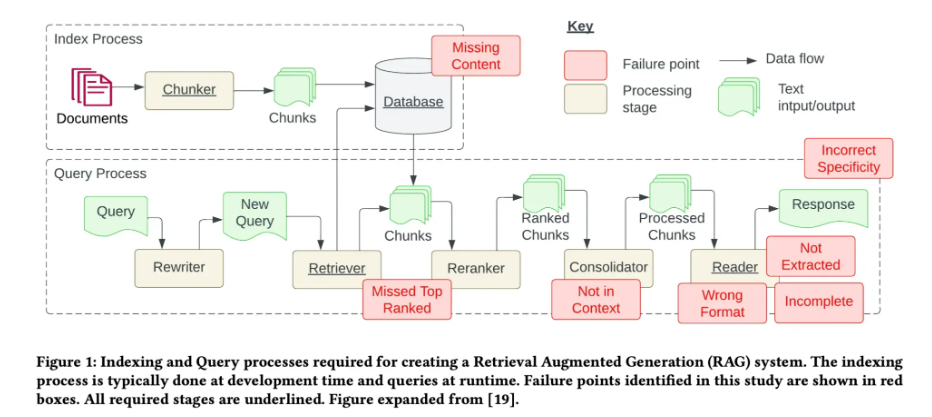

그림 상에 핑크 상자로 된 지점이 RAG를 망가뜨리는 일곱 포인트이다. 하나씩 살펴보자.
- `FP1. 콘텐츠가 없는 경우(Missing Content)`
  - 문서를 덩어리로 나누고 데이터 베이스에 넣었다 그래서 유저의 질의에 관련된 결과를 기대하며 검색을 했지만 유사도가 높은 데이터가 나오지 않는 경우이다. 데이터가 없는데 그 뒤에 어떤 노력이 의미가 있겠는가? 실제로 필자가 유튜브 RAG를 할 때, 유저가 해당 유튜버의 영상에 관련해서 질문했을 때, 질문을 가지고 유사도 검색을 하게 되는데 그 결과가 정말 만족스럽지 않았다. 정보과학에서 금언 중에 하나는 “가비지 인, 가비지 아웃”이다. 검색 결과가 쓰레기 값이 나왔는데 아무리 LLM이 말을 잘한다고 해도 아무 말 대잔치가 벌어지게 되는 것이다.

- `FP2. 최고 랭킹을 빠트림(Missed Top Ranked)`
  - 어떤 경우에는 분명히 문서에 있는데, 벡터 쿼리 결과 랭킹에는 누락되는 현상이 존재한다. 이 경우는 덩어리를 만드는 과정에서 콘텍스트가 유실된 경우가 많다. 즉 랭킹에 관련된 중한 정보가 두 덩어리로 잘못 나눠져 버렸다면, 그 맥락을 잃어버려서 랭킹에서 누락되는 것이다. 이런 경우에는 오버래핑해서 정보 유실을 줄이는 대안도 생각해 볼 수 있겠다.

- `FP3. 맥락과 맞지 않음( Not in Context)`
  - 유저의 질의응답을 잘 가공해서 검색하고 결과에서 제대로 랭킹까지 했다고 치자. 하지만, 답변 생성을 위한 컨텍스트와 맞지 않은 결과가 최종 선택되어 버린 경우이다. 팩트는 비슷한데, 질문의 맥락과는 떨어져 있는 결과를 생성하여 RAG 실패로 귀결된다.

- `FP4. 모델에서 생성 실패(Not extracted)`
  - 답변이 문맥에 맞게 잘 주어졌다. 그런데 모델이 정확한 정보를 생성하는데 실패한다. 프롬프트 내부에 모순이 있어가 노이즈가 많이 낀 경우 주로 발생한다.

- `FP5. 잘못된 포맷(Wrong format)`
  - 표나 리스트 형식으로 혹은 JSON 형식으로 뽑아 달라고 했는데 실패하는 경우다.

- `FP6. 틀린 디테일(Incorrect specificity)`
  - 답이 제대로 포함되어 결과가 나오고 있지만, 너무 일반적으로 표현되거나 반대로 너무 디테일하게 표현함으로 망하는 경우이다. 사용자가 질문을 할 때 어떻게 질문해야 할지 모르거나 너무 일반화된 질문을 하게 되면 이런 답이 나와서 RAG가 망한다.

- `FP7. 불완전(Incomplete)`
  - 불완전한 답은 정확하지만, 어떤 정보는 빠트리는 경우이다. 유저의 질문 중에 A, B, C 문서를 읽고 키포인트를 정리하라고 했을 경우에 잘 발생하는데, 이것은 질문을 몇 개로 나눠서 질문함으로 극복할 수 있다.